In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import *

In [4]:
runners_on = pd.read_csv('2022 Runners.csv')
runners_off = pd.read_csv('2022 No Runners.csv')

newdata = pd.merge(runners_on, runners_off, on='player_name', suffixes=('_x','_y'))
newdata['xwobadifference'] = newdata['xwoba_x'] - newdata['xwoba_y']


# Only using pitchers with more than 500 pitches

In [5]:
filtered_data = newdata[(newdata['total_pitches_x'] > 500) & (newdata['total_pitches_y'] > 500)]
X = filtered_data[['total_pitches_x', 'total_pitches_y']]
y = filtered_data['xwobadifference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
new_pitches_x = [600, 550, 700]
new_pitches_y = [500, 600, 450]
new_data = pd.DataFrame({'total_pitches_x': new_pitches_x, 'total_pitches_y': new_pitches_y})
predictions = model.predict(new_data)

In [7]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
for i in range(len(predictions)):
    print("Prediction", i+1, ":", predictions[i])
print("Root Mean Squared Error (RMSE):", rmse)

Prediction 1 : 0.006049999999999979
Prediction 2 : 0.0003599999999999959
Prediction 3 : -0.019719999999999998
Root Mean Squared Error (RMSE): 0.0356696594212197


#### Predicting pitchers to do worse with runners on the more pitches they've thrown (regular SP's)

# List of top pitchers

In [8]:
sorted_data = filtered_data.sort_values(by='xwobadifference', ascending=False)
top_pitchers = sorted_data.head(10)['player_name']
print("Top 10 pitchers based on xwobadifference:")
for pitcher in top_pitchers:
    print(pitcher)

Top 10 pitchers based on xwobadifference:
Kopech, Michael
Plesac, Zach
Wells, Tyler
Fedde, Erick
Strider, Spencer
Lodolo, Nick
Civale, Aaron
Houser, Adrian
Bradish, Kyle
Mahle, Tyler


C:\Users\slugg\AppData\Local\Temp\ipykernel_27328\2322745002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


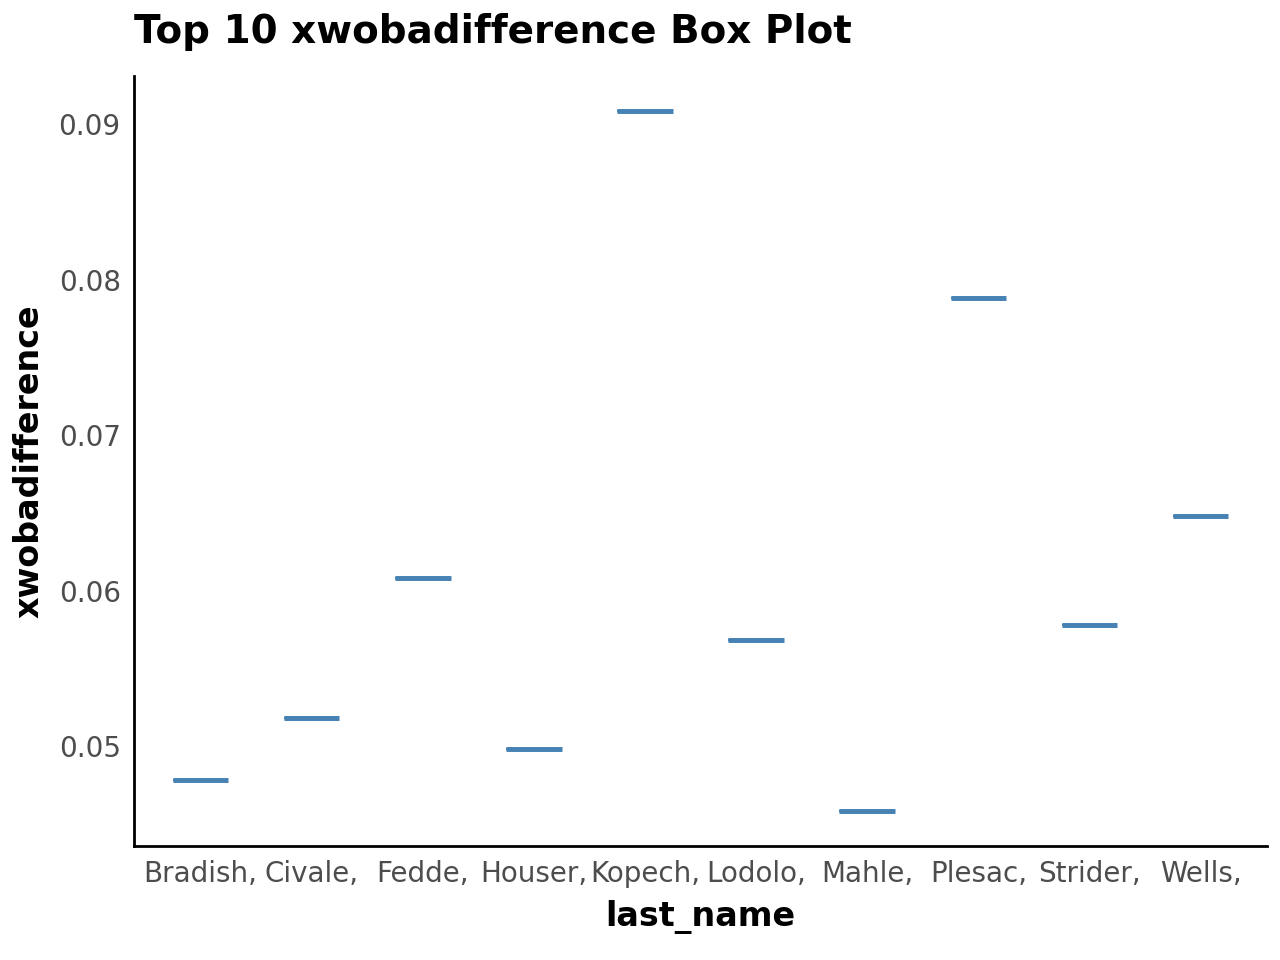

<Figure Size: (640 x 480)>

In [20]:
combo = sorted_data.head(10)
combo['last_name'] = combo['player_name'].str.split().str[0]
(ggplot(combo) +
 geom_boxplot(aes(x='last_name', y='xwobadifference'), fill='lightblue', color='steelblue', alpha=0.8, width=0.5) +
 labs(title='Top 10 xwobadifference Box Plot',
      x='last_name',
      y='xwobadifference') +
 theme_minimal() +
 theme(plot_title=element_text(size=14, weight='bold'),
       axis_text=element_text(size=10),
       axis_title=element_text(size=12, weight='bold'),
       axis_line=element_line(color='black'),
       panel_grid_major=element_blank(),
       panel_grid_minor=element_blank(),
       legend_position='none')
)